# Process data from a simulation of the infinite sites model

Author: Juvid Aryaman


In [1]:
import mitonetworks.utls as utls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

In [2]:
warnings.simplefilter("ignore", UserWarning) # when generating svg's get lots of useless UserWarnings, so suppress them

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
utls.reset_plots()

In [5]:
fs_arr = [0.2,0.4,0.6,0.8]

In [6]:
cm = plt.get_cmap("gray")
colors = (np.arange(0,len(fs_arr)))/float(len(fs_arr))
cvals = cm(colors[::-1])
cvals[:,-1] = 0.5
cvals[-1] = [1,0,0,1]

In [7]:
symbols = ['d','o','s','*']

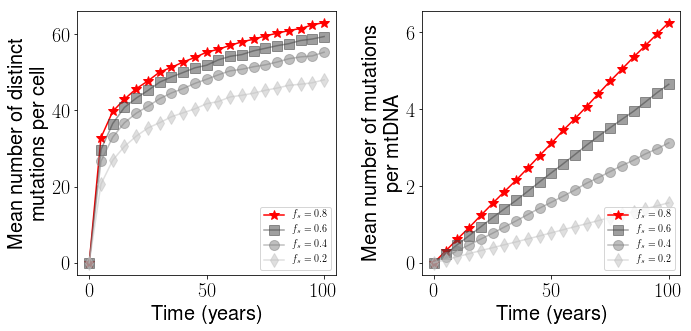

In [14]:
plt.close('all')
fig, axs = plt.subplots(1,2, figsize = (2*5,1*5))
axs = axs.ravel()
for j in range(4):
    i = 3-j
    fs = fs_arr[i]
    data = pd.read_csv('output_{}.txt'.format(i), delimiter=',',skiprows=5)

    data['n_hom_mutants'] = data['n_mutants'] - data['n_het_mutants']

    g = data[['t','n_mutants','n_het_mutants','n_hom_mutants','mean_mutn_indiv','std_mutn_indiv']].groupby('t')

    means = g.mean()
    stds = g.std(ddof=1)
    
    ax = axs[0]
    #     if i == 3:
    #         ax.errorbar(means.index/365.0,means['n_mutants'],yerr=stds['n_mutants']/np.sqrt(1000), fmt = '-{}'.format(symbols[i]), capsize=5,
    #                     color = cvals[i], label = '$f_s = {}$'.format(fs))
    #         ax.plot(means.index/365.0,means['n_mutants'], '-{}'.format(symbols[i]), 
    #                     color = cvals[i], label = '$f_s = {}$'.format(fs))

    #     else:
    ax.plot(means.index/365.0,means['n_mutants'], '-{}'.format(symbols[i]), 
                    color = cvals[i], label = '$f_s = {}$'.format(fs))
        
    ax.set_xlabel('Time (years)')
    ax.set_ylabel('Mean number of distinct \nmutations per cell')


    ax = axs[1]
    #     if i == 3:
    #         ax.errorbar(means.index/365.0,means['mean_mutn_indiv'],yerr=means['std_mutn_indiv']/np.sqrt(1000), fmt = '-{}'.format(symbols[i]), capsize=5,
    #                 color = cvals[i], label = '$f_s = {}$'.format(fs))
    #         ax.plot(means.index/365.0,means['mean_mutn_indiv'], '-{}'.format(symbols[i]), 
    #                 color = cvals[i], label = '$f_s = {}$'.format(fs))
    #     else:
    ax.plot(means.index/365.0,means['mean_mutn_indiv'], '-{}'.format(symbols[i]), 
                color = cvals[i], label = '$f_s = {}$'.format(fs))
        
    ax.set_xlabel('Time (years)')
    ax.set_ylabel('Mean number of mutations\n per mtDNA')

for i in range(2):
    axs[i].legend(handles, labels, prop={'size':10}, loc = "lower right")    


plt.tight_layout()
plt.savefig('inf_sites_fs.svg')